In [1]:
#Load packages
import xarray as xr
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import matplotlib.colors as colors
import pandas as pd
import cartopy.crs as ccrs
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import matplotlib.patches as mpatches


In [2]:
#Load topography
continents=xr.open_dataset('/p/projects/ace/data/DeepMIP/EECO/gmd-7-2077-2014-supplement/Supp/herold_etal_eocene_topo_1x1.nc')
#continents.topo.plot(cmap='terrain',vmin=-4500,vmax=4500)
lo_masks=(continents.topo>0)

## Climber-3a

### CO2

In [18]:
def weighted_mean_c3(file):
    variable=file
    weights=np.cos(np.deg2rad(variable['yt_j']))
    weights.name="weights"

    k=np.zeros(200)#[]
    for t in range(0,200):
        r=(variable.isel(Time=int(t)).mean(dim='xt_i')*weights).sum()/weights.sum()

        k[t]=r
        
    return k

In [15]:
def plot_c3a(var,title):   

    #create zonal mean 
    temp_280_mean=nc_280[var].mean(dim='Time')
    zonal_280=temp_280_mean.mean(dim='xt_i')
    
    #create differences
    diff_560=nc_560[var].mean(dim='Time')#-zonal_280
    diff_840=nc_840[var].mean(dim='Time')#-zonal_280
    diff_1120=nc_1120[var].mean(dim='Time')#-zonal_280
    diff_1680=nc_1680[var].mean(dim='Time')#-zonal_280


    fig,axs=plt.subplots(2,2, subplot_kw={'projection': ccrs.Robinson()},facecolor='w',figsize=(16,7)) #
    p=diff_560.plot(ax=axs[0,0],transform=ccrs.PlateCarree(),cmap='RdBu_r',vmin=-20,vmax=35)
    p=diff_840.plot(ax=axs[0,1],transform=ccrs.PlateCarree(),cmap='RdBu_r',vmin=-20,vmax=35)
    diff_1120.plot(ax=axs[1,0],transform=ccrs.PlateCarree(),cmap='RdBu_r',vmin=-20,vmax=35)
    diff_1680.plot(ax=axs[1,1],transform=ccrs.PlateCarree(),cmap='RdBu_r',vmin=-20,vmax=35)
    for ax in axs.flat:
        lo_masks.plot.contour(ax=ax,transform=ccrs.PlateCarree(),levels=[0.5],colors='k');
        ax.set(xlabel='x-label', ylabel='y-label')
        axs[0,0].set_title('560ppm')
        axs[0,1].set_title('840ppm')
        axs[1,0].set_title('1120ppm')
        axs[1,1].set_title('1680ppm')


    fig.suptitle(title, fontsize=16)

    plt.show()


In [4]:
#Load CO2 files
nc_280=xr.open_dataset('/p/projects/ace/petri/c3beta_eocn_055Ma_0280ppm/snapshots_potsdam2-yearmean-200y.nc')
nc_840=xr.open_dataset('/p/projects/ace/petri/c3beta_eocn_055Ma_0840ppm/snapshots_potsdam2-yearmean-200y.nc')
nc_560=xr.open_dataset('/p/projects/ace/petri/c3beta_eocn_055Ma_0560ppm/snapshots_potsdam2-yearmean-200y.nc')
nc_1120=xr.open_dataset('/p/projects/ace/petri/c3beta_eocn_055Ma_1120ppm/snapshots_potsdam2-yearmean-200y.nc')
nc_1680=xr.open_dataset('/p/projects/ace/petri/c3beta_eocn_055Ma_1680ppm/snapshots_potsdam2-yearmean-200y.nc')                      
nc_3360=xr.open_dataset('/p/projects/ace/petri/c3beta_eocn_055Ma_3360ppm/snapshots_potsdam2-yearmean-200y.nc')


/p/system/packages/anaconda/5.0.0_py3/envs/idp/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/p/system/packages/anaconda/5.0.0_py3/envs/idp/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


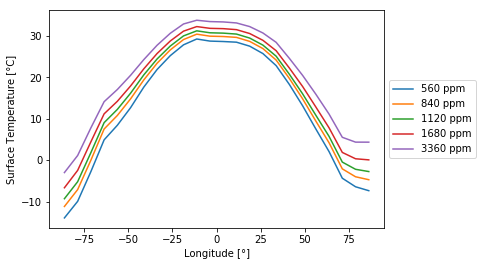

In [9]:
zon_280=nc_280['ts'].mean(dim='Time').mean(dim='xt_i')
zon_560=nc_560['ts'].mean(dim='Time').mean(dim='xt_i')
zon_840=nc_840['ts'].mean(dim='Time').mean(dim='xt_i')
zon_1120=nc_1120['ts'].mean(dim='Time').mean(dim='xt_i')
zon_1680=nc_1680['ts'].mean(dim='Time').mean(dim='xt_i')
zon_3360=nc_3360['ts'].mean(dim='Time').mean(dim='xt_i')

plt.plot(zon_560['yt_j'],zon_560,label='560 ppm')
plt.plot(zon_840['yt_j'],zon_840,label='840 ppm')
plt.plot(zon_1120['yt_j'],zon_1120,label='1120 ppm')
plt.plot(zon_1680['yt_j'],zon_1680,label='1680 ppm')
plt.plot(zon_3360['yt_j'],zon_3360,label='3360 ppm')


plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.xlabel('Longitude [°]')
plt.ylabel('Surface Temperature [°C]')
plt.show()

In [10]:
nc_280.ts['yt_j']

<xarray.DataArray 'yt_j' (yt_j: 24)>
array([-86.25, -78.75, -71.25, -63.75, -56.25, -48.75, -41.25, -33.75, -26.25,
       -18.75, -11.25,  -3.75,   3.75,  11.25,  18.75,  26.25,  33.75,  41.25,
        48.75,  56.25,  63.75,  71.25,  78.75,  86.25], dtype=float32)
Coordinates:
  * yt_j     (yt_j) float32 -86.25 -78.75 -71.25 -63.75 -56.25 -48.75 -41.25 ...
Attributes:
    standard_name:  latitude
    long_name:      Latitude of T points
    units:          degrees_N
    axis:           Y

In [11]:
nc_280.ts.yt_j

<xarray.DataArray 'yt_j' (yt_j: 24)>
array([-86.25, -78.75, -71.25, -63.75, -56.25, -48.75, -41.25, -33.75, -26.25,
       -18.75, -11.25,  -3.75,   3.75,  11.25,  18.75,  26.25,  33.75,  41.25,
        48.75,  56.25,  63.75,  71.25,  78.75,  86.25], dtype=float32)
Coordinates:
  * yt_j     (yt_j) float32 -86.25 -78.75 -71.25 -63.75 -56.25 -48.75 -41.25 ...
Attributes:
    standard_name:  latitude
    long_name:      Latitude of T points
    units:          degrees_N
    axis:           Y

In [19]:
c3_280=weighted_mean_c3(nc_280.ts)
c3_560=weighted_mean_c3(nc_560.ts)
c3_840=weighted_mean_c3(nc_840.ts)
c3_1120=weighted_mean_c3(nc_1120.ts)
c3_1680=weighted_mean_c3(nc_1680.ts)
c3_3360=weighted_mean_c3(nc_3360.ts)

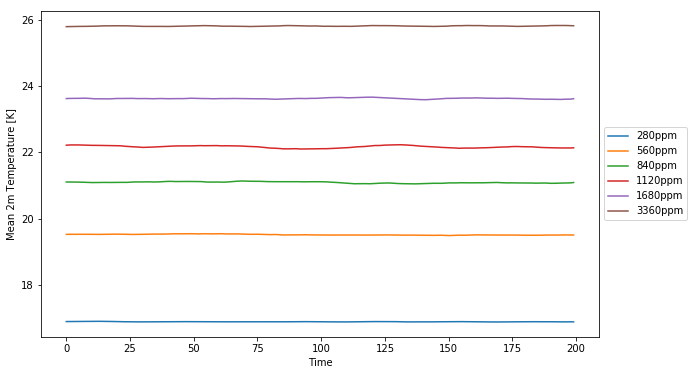

In [23]:
plt.figure(figsize=(10,6))
time=np.arange(0,200,1)
plt.plot(time,c3_280,label='280ppm')
plt.plot(time,c3_560,label='560ppm')
plt.plot(time,c3_840,label='840ppm')
plt.plot(time,c3_1120,label='1120ppm')
plt.plot(time,c3_1680,label='1680ppm')
plt.plot(time,c3_3360,label='3360ppm')

plt.xlabel('Time')
plt.ylabel('Mean 2m Temperature [K]')
#plt.ylim(280,300)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [25]:
c3_280=weighted_mean_c3(nc_280.fice)
c3_560=weighted_mean_c3(nc_560.fice)
c3_840=weighted_mean_c3(nc_840.fice)
c3_1120=weighted_mean_c3(nc_1120.fice)
c3_1680=weighted_mean_c3(nc_1680.fice)
c3_3360=weighted_mean_c3(nc_3360.fice)

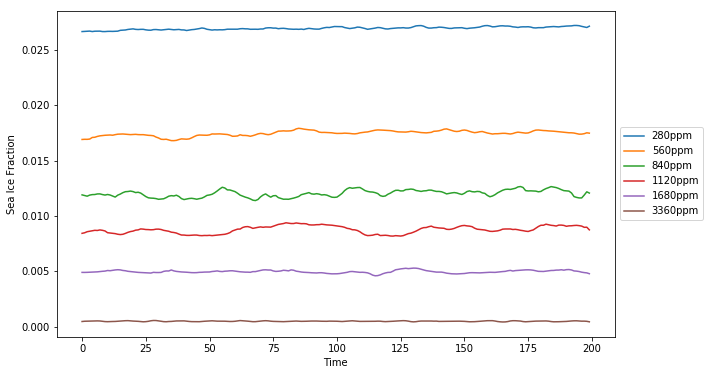

In [26]:
plt.figure(figsize=(10,6))
time=np.arange(0,200,1)
plt.plot(time,c3_280,label='280ppm')
plt.plot(time,c3_560,label='560ppm')
plt.plot(time,c3_840,label='840ppm')
plt.plot(time,c3_1120,label='1120ppm')
plt.plot(time,c3_1680,label='1680ppm')
plt.plot(time,c3_3360,label='3360ppm')

plt.xlabel('Time')
plt.ylabel('Sea Ice Fraction')
#plt.ylim(280,300)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

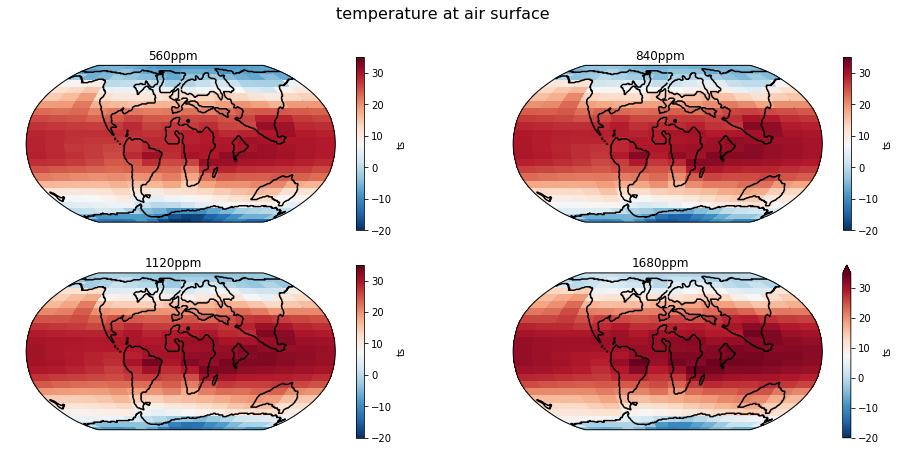

In [16]:
plot_c3a('ts','temperature at air surface')

### Temperature at ocean surface

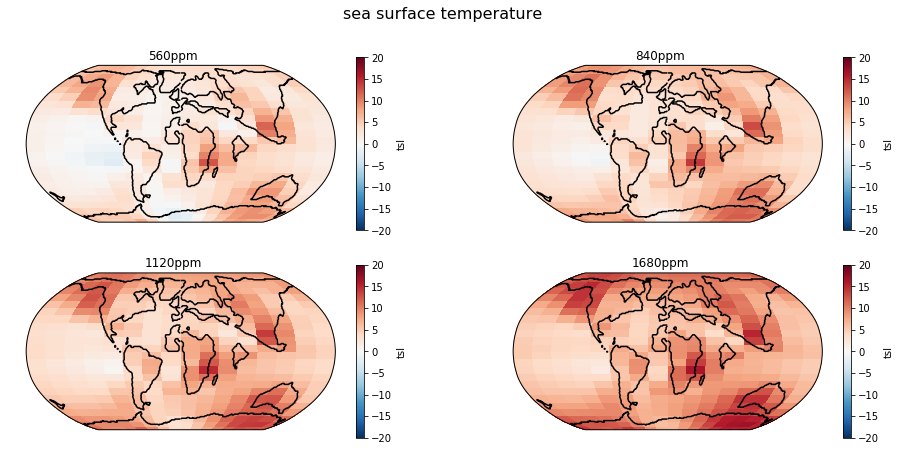

In [13]:
plot_c3a('tsl','sea surface temperature')

### Orbital Parameters

In [5]:
#Load files 
c3_ob22_e0_p0=xr.open_dataset('/home/evalu/c3-eocene/c3beta_eocn_055Ma_0840ppm_022p5_E0_P0_snapshots_potsdam2-yearmean.nc')
c3_ob23_e0_p0=xr.open_dataset('/home/evalu/c3-eocene/c3beta_eocn_055Ma_0840ppm_023p5_E0_P0_snapshots_potsdam2_yearmean.nc')
c3_ob24_e0_p0=xr.open_dataset('/home/evalu/c3-eocene/c3beta_eocn_055Ma_0840ppm_024p5_E0_P0_snapshots_potsdam2-yearmean.nc')
c3_ob24_e69_p180=xr.open_dataset('/home/evalu/c3-eocene/c3beta_eocn_055Ma_0840ppm_024p5_E0p069_P180_snapshpts_potsdam2-yearmean.nc')
c3_ob24_e69_p270=xr.open_dataset('/home/evalu/c3-eocene/c3beta_eocn_055Ma_0840ppm_024p5_E0p069_P270_snapshpts_potsdam2-yearmean.nc')
c3_ob24_e69_p90=xr.open_dataset('/home/evalu/c3-eocene/c3beta_eocn_055Ma_0840ppm_024p5_E0p069_P90_snapshpts_potsdam2-yearmean.nc')

In [15]:
c3_280ppm=xr.open_dataset('/p/projects/ace/petri/c3beta_eocn_055Ma_0280ppm/snapshots_potsdam2-yearmean-200y.nc')

/p/system/packages/anaconda/5.0.0_py3/envs/idp/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/p/system/packages/anaconda/5.0.0_py3/envs/idp/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


In [16]:
#PI 
zonal=c3_ob22_e0_p0['ts'].mean(dim='Time').mean(dim='xt_i').plot()
plt.show()

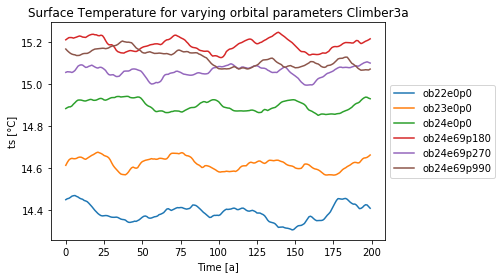

In [18]:
#not area weighted
timeseries(c3_ob22_e0_p0,'ts',label='ob22e0p0')
timeseries(c3_ob23_e0_p0,'ts',label='ob23e0p0')
timeseries(c3_ob24_e0_p0,'ts',label='ob24e0p0')
timeseries(c3_ob24_e69_p180,'ts',label='ob24e69p180')
timeseries(c3_ob24_e69_p270,'ts',label='ob24e69p270')
timeseries(c3_ob24_e69_p90,'ts',label='ob24e69p990')          
plt.ylabel('ts [°C]')
plt.xlabel('Time [a]')
plt.title('Surface Temperature for varying orbital parameters Climber3a')
plt.show()

In [19]:
def plot_c3a_orb(var,title,vmin,vmax):   

    #create zonal mean 
    zonal=c3_ob22_e0_p0[var].mean(dim='Time')#.mean(dim='xt_i')
    
    #create differences
    diff2200=c3_ob22_e0_p0[var].mean(dim='Time')-zonal
    diff2300=c3_ob23_e0_p0[var].mean(dim='Time')-zonal
    diff2400=c3_ob24_e0_p0[var].mean(dim='Time')-zonal
    diff2469180=c3_ob24_e69_p180[var].mean(dim='Time')-zonal
    diff2469270=c3_ob24_e69_p270[var].mean(dim='Time')-zonal
    diff246990=c3_ob24_e69_p90[var].mean(dim='Time')-zonal


    fig,axs=plt.subplots(3,2, subplot_kw={'projection': ccrs.Robinson()},facecolor='w',figsize=(15,7)) #
    diff2200.plot(ax=axs[0,0],transform=ccrs.PlateCarree(),cmap='RdBu_r',vmin=vmin,vmax=vmax)
    diff2300.plot(ax=axs[0,1],transform=ccrs.PlateCarree(),cmap='RdBu_r',vmin=vmin,vmax=vmax)
    diff2400.plot(ax=axs[1,0],transform=ccrs.PlateCarree(),cmap='RdBu_r',vmin=vmin,vmax=vmax)
    diff2469180.plot(ax=axs[1,1],transform=ccrs.PlateCarree(),cmap='RdBu_r',vmin=vmin,vmax=vmax)
    diff2469270.plot(ax=axs[2,0],transform=ccrs.PlateCarree(),cmap='RdBu_r',vmin=vmin,vmax=vmax)
    diff246990.plot(ax=axs[2,1],transform=ccrs.PlateCarree(),cmap='RdBu_r',vmin=vmin,vmax=vmax)
    
    
    for ax in axs.flat:
        lo_masks.plot.contour(ax=ax,transform=ccrs.PlateCarree(),levels=[0.5],colors='k');
        ax.set(xlabel='x-label', ylabel='y-label')
        axs[0,0].set_title('C3_ob22_e0_p0')
        axs[0,1].set_title('c3_ob23_e0_p0')
        axs[1,0].set_title('c3_ob24_e0_p0')
        axs[1,1].set_title('c3_ob24_e69_p180')
        axs[2,0].set_title('c3_ob24_e69_p270')
        axs[2,1].set_title('c3_ob24_e69_p90')
        

    fig.suptitle(title, fontsize=16)

    plt.show() 

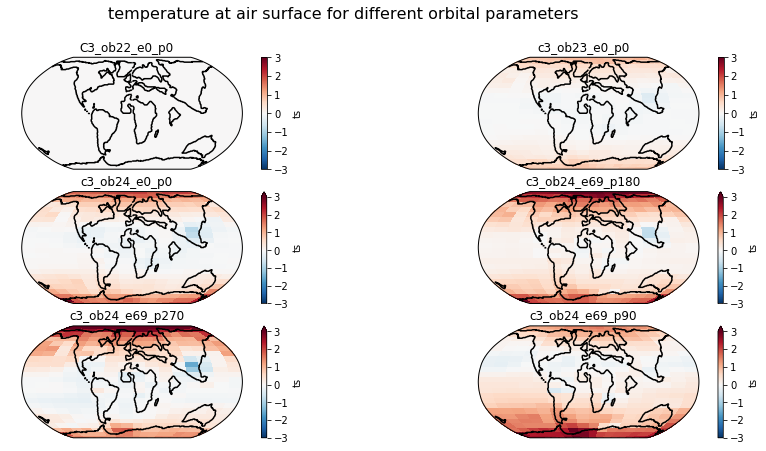

In [20]:
plot_c3a_orb('ts','temperature at air surface for different orbital parameters',-3,3)

## Climber-X

### CO2 runs 

In [4]:
def weighted_mean(file,maxrange):
    variable=file.mean(dim='mon')
    weights=np.cos(np.deg2rad(variable.lat))
    weights.name="weights"

    k=np.zeros(maxrange)#[]
    for t in range(0,maxrange):
        r=(variable.isel(time=int(t)).mean(dim='lon')*weights).sum()/weights.sum()

        k[t]=r      
        

    return k

In [5]:
def slice200a(infile,var):
    temp=infile[var][::]
    startyear=temp.time[-21]
    endyear=temp.time[-1]
    temp_200=temp.sel(time=slice(startyear,endyear))
    
    return temp_200

In [6]:
def plot_anomaly(v280_200,v560_200,v840_200,v1120_200,v1680_200,v3360_200,cbar,title,vmin,vmax):   

    #create zonal mean 
    eqtemp280_zonal=v280_200.mean(dim='time').mean(dim='mon').mean(dim='lon')


    #create differences
   #diff280=v280_200.mean(dim='time').mean(dim='mon')-eqtemp280_zonal
    diff560=v560_200.mean(dim='time').mean(dim='mon')-eqtemp280_zonal
    diff840=v840_200.mean(dim='time').mean(dim='mon')-eqtemp280_zonal
    diff1120=v1120_200.mean(dim='time').mean(dim='mon')-eqtemp280_zonal
    diff1680=v1680_200.mean(dim='time').mean(dim='mon')-eqtemp280_zonal
    diff3360=v3360_200.mean(dim='time').mean(dim='mon')-eqtemp280_zonal



    fig,axs=plt.subplots(3,2, subplot_kw={'projection': ccrs.Robinson()},facecolor='w',figsize=(15,7)) #
    #diff280.plot(ax=axs[0,0],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)
    diff560.plot(ax=axs[0,1],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)
    diff840.plot(ax=axs[1,0],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)
    diff1120.plot(ax=axs[1,1],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)
    diff1680.plot(ax=axs[2,0],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)
    diff3360.plot(ax=axs[2,1],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)
    
    
    for ax in axs.flat:
        lo_masks.plot.contour(ax=ax,transform=ccrs.PlateCarree(),levels=[0.5],colors='k');
        ax.set(xlabel='x-label', ylabel='y-label')
        #axs[0,0].set_title('280ppm')
        axs[0,1].set_title('560ppm')
        axs[1,0].set_title('840ppm')
        axs[1,1].set_title('1120ppm')
        axs[2,0].set_title('1680ppm')
        axs[2,1].set_title('3360ppm')
        

    fig.suptitle(title, fontsize=16)

    plt.show() 

In [7]:
def plot_map(v280_200,v560_200,v840_200,v1120_200,v1680_200,v3360_200,cbar,title,vmin,vmax,mon=True):   

    if mon==True:
        diff280=v280_200.mean(dim='time').mean(dim='mon')
        diff560=v560_200.mean(dim='time').mean(dim='mon')
        diff840=v840_200.mean(dim='time').mean(dim='mon')
        diff1120=v1120_200.mean(dim='time').mean(dim='mon')
        diff1680=v1680_200.mean(dim='time').mean(dim='mon')
        diff3360=v3360_200.mean(dim='time').mean(dim='mon')

    else:
        diff280=v280_200.mean(dim='time').mean(dim='month')
        diff560=v280_200.mean(dim='time').mean(dim='month')
        diff840=v840_200.mean(dim='time').mean(dim='month')
        diff1120=v1120_200.mean(dim='time').mean(dim='month')
        diff1680=v1680_200.mean(dim='time').mean(dim='month')
        diff3360=v3360_200.mean(dim='time').mean(dim='month')
  

    fig,axs=plt.subplots(3,2, subplot_kw={'projection': ccrs.Robinson()},facecolor='w',figsize=(15,7)) #
    diff280.plot(ax=axs[0,0],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)
    diff560.plot(ax=axs[0,1],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)
    diff840.plot(ax=axs[1,0],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)
    diff1120.plot(ax=axs[1,1],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)
    diff1680.plot(ax=axs[2,0],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)
    diff3360.plot(ax=axs[2,1],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)
    
    
    for ax in axs.flat:
        lo_masks.plot.contour(ax=ax,transform=ccrs.PlateCarree(),levels=[0.5],colors='k');
        ax.set(xlabel='x-label', ylabel='y-label')
        axs[0,0].set_title('280ppm')
        axs[0,1].set_title('560ppm')
        axs[1,0].set_title('840ppm')
        axs[1,1].set_title('1120ppm')
        axs[2,0].set_title('1680ppm')
        axs[2,1].set_title('3360ppm')
        

    fig.suptitle(title, fontsize=16)

    plt.show() 

In [8]:
def plot_poles_ts(filename,title):
    northpl = filename.mean(dim='mon').isel(lat=slice(-5,None))
    southpl = filename.mean(dim='mon').isel(lat=slice(0,5))

    # Calculate the mean over the selected region
    mean_northpl= northpl.mean(dim=('lat', 'lon'))
    mean_southpl= southpl.mean(dim=('lat', 'lon'))


    # Plot the timeseries
    mean_northpl.plot(label='NH',color='k')
    mean_southpl.plot(label='SH',color='purple')
    
    plt.title
    plt.legend()
    plt.show()

#### Atm.nc

In [6]:
#included restart files

Path='/p/projects/ace/petri/climber-x-eocene/55Ma_'

cx_280_4=xr.open_mfdataset([Path+'0280ppm_eq/0002000.atm.nc',Path+'0280ppm_eq/0003000.atm.nc',Path+'0280ppm_eq/0004000.atm.nc'])
cx_560_4=xr.open_mfdataset([Path+'0560ppm_eq/0002000.atm.nc',Path+'0560ppm_eq/0003000.atm.nc',Path+'0560ppm_eq/0004000.atm.nc'])
cx_840_4=xr.open_mfdataset([Path+'0840ppm_eq/0002000.atm.nc',Path+'0840ppm_eq/0003000.atm.nc',Path+'0840ppm_eq/0004000.atm.nc'])
cx_1120_4=xr.open_mfdataset([Path+'1120ppm_eq/0002000.atm.nc',Path+'1120ppm_eq/0003000.atm.nc',Path+'1120ppm_eq/0004000.atm.nc'])
cx_1680_4=xr.open_mfdataset([Path+'1680ppm_eq/0002000.atm.nc',Path+'1680ppm_eq/0003000.atm.nc',Path+'1680ppm_eq/0004000.atm.nc'])
cx_3360_4=xr.open_mfdataset([Path+'3360ppm_eq/0002000.atm.nc',Path+'3360ppm_eq/0003000.atm.nc',Path+'3360ppm_eq/0004000.atm.nc'])



In [28]:
temp280_200=slice200a(cx_280_4,'t2a')
temp560_200=slice200a(cx_560_4,'t2a')
temp840_200=slice200a(cx_840_4,'t2a')
temp1120_200=slice200a(cx_1120_4,'t2a')
temp1680_200=slice200a(cx_1680_4,'t2a')
temp3360_200=slice200a(cx_3360_4,'t2a')

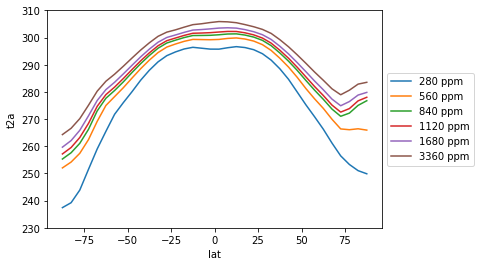

In [29]:
#Zonal mean 
temp280_200.mean(dim='time').mean(dim='mon').mean(dim='lon').plot(label='280 ppm')
temp560_200.mean(dim='time').mean(dim='mon').mean(dim='lon').plot(label='560 ppm')
temp840_200.mean(dim='time').mean(dim='mon').mean(dim='lon').plot(label='840 ppm')
temp1120_200.mean(dim='time').mean(dim='mon').mean(dim='lon').plot(label='1120 ppm')
temp1680_200.mean(dim='time').mean(dim='mon').mean(dim='lon').plot(label='1680 ppm')
temp3360_200.mean(dim='time').mean(dim='mon').mean(dim='lon').plot(label='3360 ppm')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim([230,310])
plt.show()

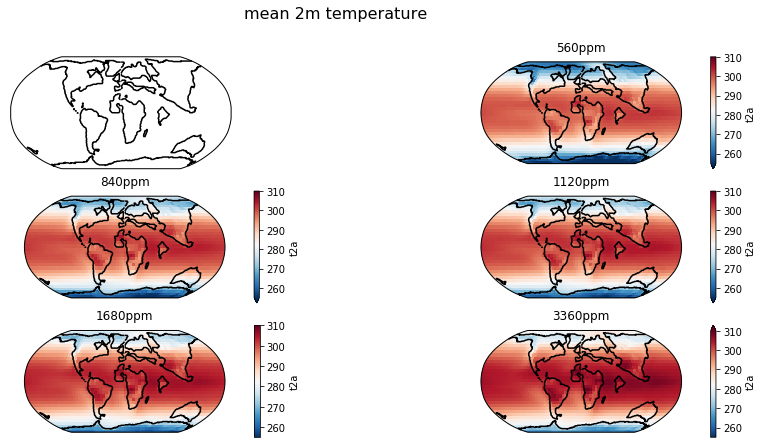

In [30]:
plot_map(temp280_200-273.15,temp560_200,temp840_200,temp1120_200,temp1680_200,temp3360_200,'RdBu_r','mean 2m temperature',255,310)

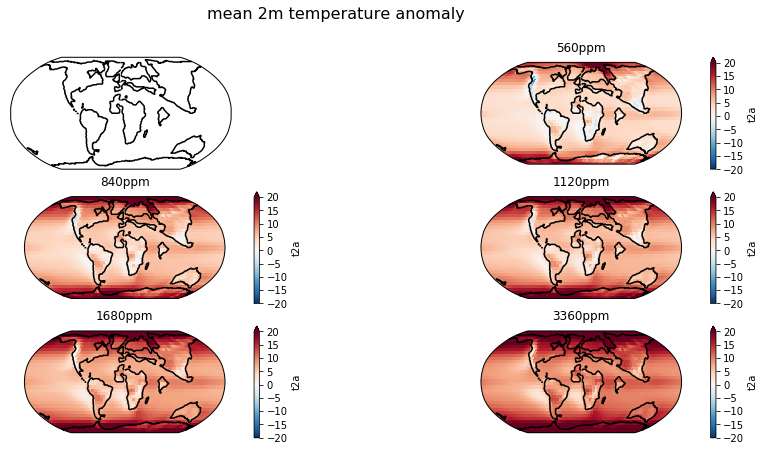

In [13]:
plot_anomaly(temp280_200,temp560_200,temp840_200,temp1120_200,temp1680_200,temp3360_200,'RdBu_r','mean 2m temperature anomaly',-20,20)

In [14]:
tsl280_200=slice200a(cx_280_4,'tsl')
tsl560_200=slice200a(cx_560_4,'tsl')
tsl840_200=slice200a(cx_840_4,'tsl')
tsl1120_200=slice200a(cx_1120_4,'tsl')
tsl1680_200=slice200a(cx_1680_4,'tsl')
tsl3360_200=slice200a(cx_3360_4,'tsl')

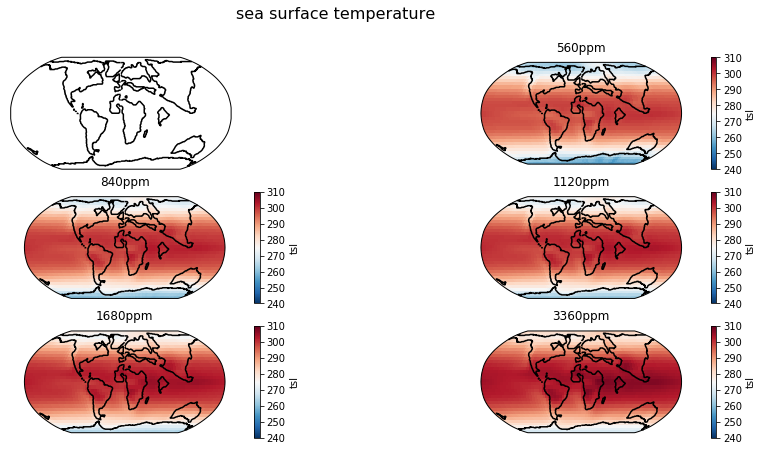

In [15]:
plot_map(tsl280_200,tsl560_200,tsl840_200,tsl1120_200,tsl1680_200,tsl3360_200,'RdBu_r','sea surface temperature',240,310)

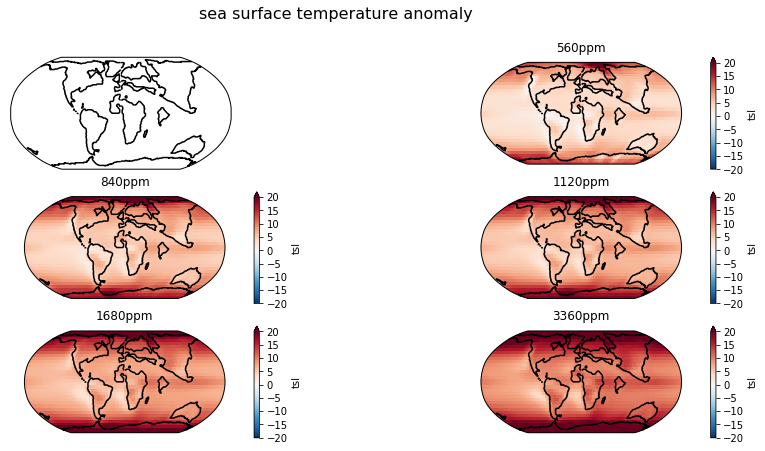

In [18]:
plot_anomaly(tsl280_200,tsl560_200,tsl840_200,tsl1120_200,tsl1680_200,tsl3360_200,'RdBu_r','sea surface temperature anomaly',-20,20)

In [19]:
wd_280=weighted_mean(cx_280_4.t2a,400)
wd_560=weighted_mean(cx_560_4.t2a,400)
wd_840=weighted_mean(cx_840_4.t2a,400)
wd_1120=weighted_mean(cx_1120_4.t2a,400)
wd_1680=weighted_mean(cx_1680_4.t2a,400)
wd_3360=weighted_mean(cx_3360_4.t2a,400)

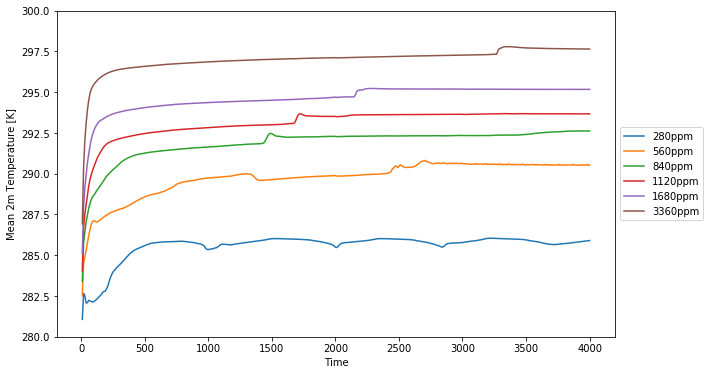

In [20]:
plt.figure(figsize=(10,6))
plt.plot(cx_280_4.t2a.time,wd_280,label='280ppm')
plt.plot(cx_560_4.t2a.time,wd_560,label='560ppm')
plt.plot(cx_840_4.t2a.time,wd_840,label='840ppm')
plt.plot(cx_1120_4.t2a.time,wd_1120,label='1120ppm')
plt.plot(cx_1680_4.t2a.time,wd_1680,label='1680ppm')
plt.plot(cx_3360_4.t2a.time,wd_3360,label='3360ppm')

plt.xlabel('Time')
plt.ylabel('Mean 2m Temperature [K]')
plt.ylim(280,300)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

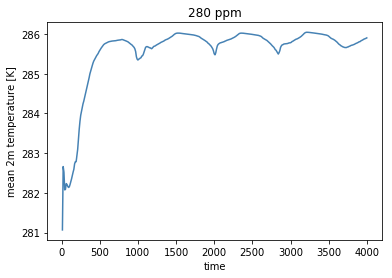

In [21]:
plt.plot(cx_280_4.t2a.time,wd_280,color='steelblue')
plt.ylabel('mean 2m temperature [K]')
plt.xlabel('time')
plt.title('280 ppm')
plt.show()

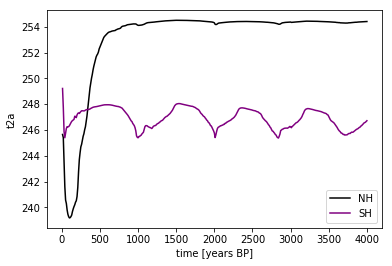

In [22]:
plot_poles_ts(cx_280_4.t2a,'280ppm')

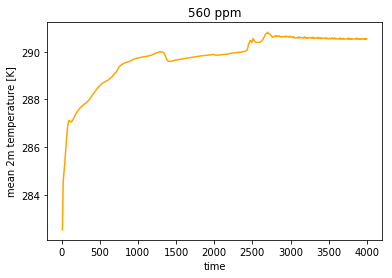

In [23]:
plt.plot(cx_560_4.t2a.time,wd_560,color='orange')
plt.ylabel('mean 2m temperature [K]')
plt.xlabel('time')
plt.title('560 ppm')
plt.show()

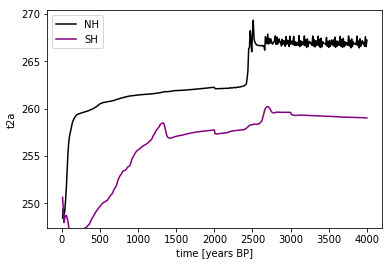

In [24]:
plot_poles_ts(cx_560_4.t2a,'560ppm')

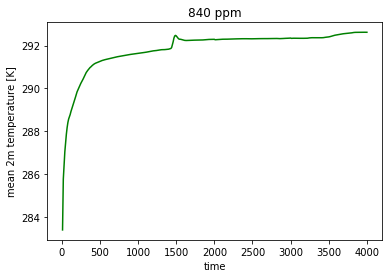

In [25]:
plt.plot(cx_840_4.t2a.time,wd_840,color='green')
plt.ylabel('mean 2m temperature [K]')
plt.xlabel('time')
plt.title('840 ppm')
plt.show()

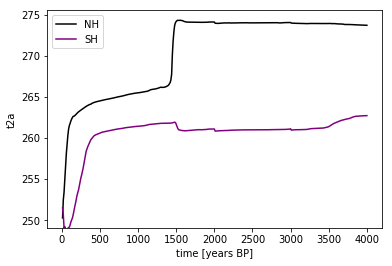

In [26]:
plot_poles_ts(cx_840_4.t2a,'840ppm')

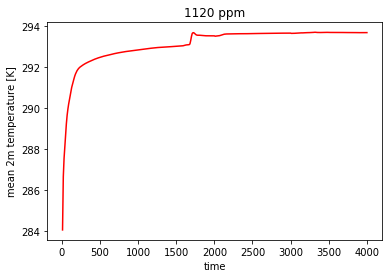

In [27]:
plt.plot(cx_1120_4.t2a.time,wd_1120,color='red')
plt.ylabel('mean 2m temperature [K]')
plt.xlabel('time')
plt.title('1120 ppm')
plt.show()

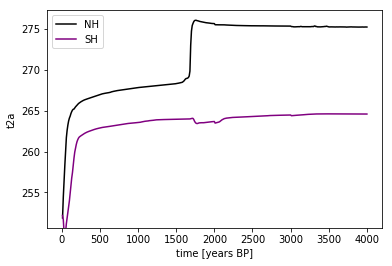

In [28]:
plot_poles_ts(cx_1120_4.t2a,'1120ppm')

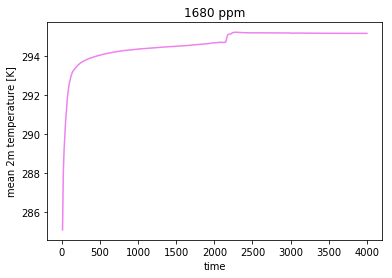

In [29]:
plt.plot(cx_1680_4.t2a.time,wd_1680,color='violet')
plt.ylabel('mean 2m temperature [K]')
plt.xlabel('time')
plt.title('1680 ppm')
plt.show()

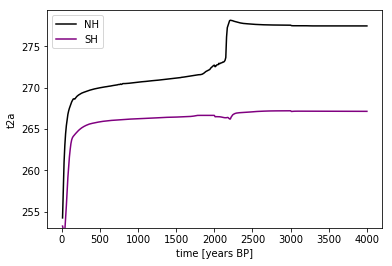

In [30]:
plot_poles_ts(cx_1680_4.t2a,'1680ppm')

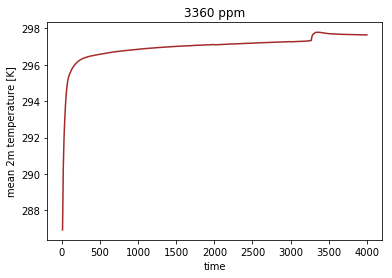

In [31]:
plt.plot(cx_3360_4.t2a.time,wd_3360,color='brown')
plt.ylabel('mean 2m temperature [K]')
plt.xlabel('time')
plt.title('3360 ppm')
plt.show()

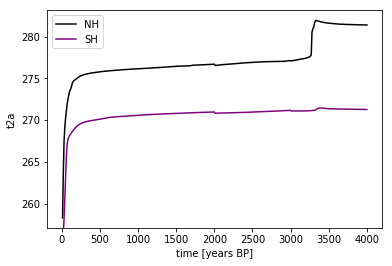

In [32]:
plot_poles_ts(cx_3360_4.t2a,'3360ppm')

#### Sic.nc

In [10]:
def weighted_mean_sic(file):
    variable=file.mean(dim='month')
    weights=np.cos(np.deg2rad(variable.lat))
    weights.name="weights"

    k=np.zeros(400)#[]
    for t in range(0,400):
        r=(variable.isel(time=int(t)).mean(dim='lon')*weights).sum()/weights.sum()

        k[t]=r
        
    return k

In [8]:
#840 ppm slice 
def slicesic(file,var,start,end):
    infile=file[var][::]
    startyear=infile.time[start]
    endyear=infile.time[end]
    returnfile=infile.sel(time=slice(startyear,endyear))
    return returnfile

In [9]:
def plot_fseaice(filename,filename2,title,title2):
    fig,(ax1, ax2)=plt.subplots(1,2, subplot_kw={'projection': ccrs.Robinson()},facecolor='w',figsize=(15,7))
    
    data1=filename.mean(dim='time').mean(dim='month')
    plot1=ax1.contourf(data1['lon'],data1['lat'],data1,cmap='bone_r',transform=ccrs.PlateCarree(),levels=np.linspace(0,1,11))
    lo_masks.plot.contour(ax=ax1,transform=ccrs.PlateCarree(),levels=[0.5],colors='k')
    cbar1 = plt.colorbar(plot1,ax=ax1, shrink=0.55,label='Sea Ice fraction')
    
    data2=filename2.mean(dim='time').mean(dim='month')
    plot2=ax2.contourf(data2['lon'],data2['lat'],data2,cmap='bone_r',transform=ccrs.PlateCarree(),levels=np.linspace(0,1,11))
    lo_masks.plot.contour(ax=ax2,transform=ccrs.PlateCarree(),levels=[0.5],colors='k')
    cbar2 = plt.colorbar(plot2,ax=ax2, shrink=0.55,label='Sea Ice fraction')

                         
    ax1.set(xlabel='x-label', ylabel='y-label')
    ax2.set(xlabel='x-label', ylabel='y-label')
    ax1.set_title(title)
    ax2.set_title(title2)
    
    plt.show()

In [10]:
def plot_fseaice_slider(filename, title):
    
    slider = widgets.IntSlider( min=0, max=400, step=1, description='Year:')
    output = widgets.Output()
    display(slider,output)
    timestep=(slider.value)
    
    
    def on_value_change(change):
        
        output.clear_output()
        with output:       
        
            fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.Robinson()}, facecolor='w', figsize=(7, 7))

            data = filename.mean(dim='month')[(change.new),:,:]
            plot = ax.contourf(data['lon'], data['lat'], data, cmap='bone_r', transform=ccrs.PlateCarree(), levels=np.linspace(0, 1, 11))
            lo_masks.plot.contour(ax=ax, transform=ccrs.PlateCarree(), levels=[0.5], colors='k')
            cbar = plt.colorbar(plot, ax=ax, shrink=0.55, label='Sea Ice fraction')

            ax.set(xlabel='Longitude', ylabel='Latitude')
            ax.set_title(title)

            plt.show()

    slider.observe(on_value_change, names='value')


In [13]:
Path='/p/projects/ace/petri/climber-x-eocene/55Ma_'
sic_cx_280=xr.open_mfdataset([Path+'0280ppm_eq/0002000.sic.nc',Path+'0280ppm_eq/0003000.sic.nc',Path+'0280ppm_eq/0004000.sic.nc'])
sic_cx_560=xr.open_mfdataset([Path+'0560ppm_eq/0002000.sic.nc',Path+'0560ppm_eq/0003000.sic.nc',Path+'0560ppm_eq/0004000.sic.nc'])
sic_cx_840=xr.open_mfdataset([Path+'0840ppm_eq/0002000.sic.nc',Path+'0840ppm_eq/0003000.sic.nc',Path+'0840ppm_eq/0004000.sic.nc'])
sic_cx_1120=xr.open_mfdataset([Path+'1120ppm_eq/0002000.sic.nc',Path+'1120ppm_eq/0003000.sic.nc',Path+'1120ppm_eq/0004000.sic.nc'])
sic_cx_1680=xr.open_mfdataset([Path+'1680ppm_eq/0002000.sic.nc',Path+'1680ppm_eq/0003000.sic.nc',Path+'1680ppm_eq/0004000.sic.nc'])
sic_cx_3360=xr.open_mfdataset([Path+'3360ppm_eq/0002000.sic.nc',Path+'3360ppm_eq/0003000.sic.nc',Path+'3360ppm_eq/0004000.sic.nc'])

In [41]:
#area weighted 
sicweighted_280=weighted_mean_sic(sic_cx_280.fsic)
sicweighted_560=weighted_mean_sic(sic_cx_560.fsic)
sicweighted_840=weighted_mean_sic(sic_cx_840.fsic)
sicweighted_1120=weighted_mean_sic(sic_cx_1120.fsic)
sicweighted_1680=weighted_mean_sic(sic_cx_1680.fsic)
sicweighted_3360=weighted_mean_sic(sic_cx_3360.fsic)

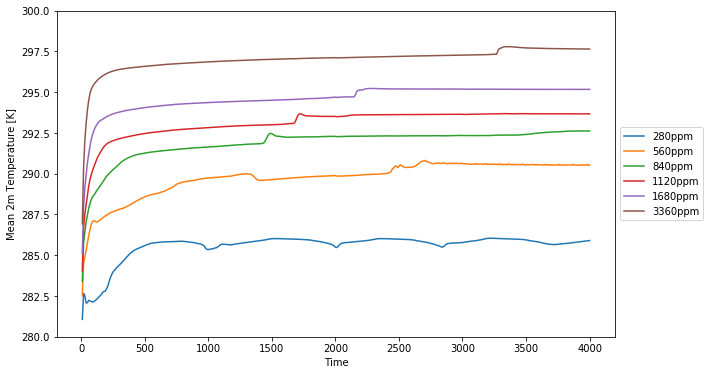

In [20]:
plt.figure(figsize=(10,6))
plt.plot(cx_280_4.t2a.time,wd_280,label='280ppm')
plt.plot(cx_560_4.t2a.time,wd_560,label='560ppm')
plt.plot(cx_840_4.t2a.time,wd_840,label='840ppm')
plt.plot(cx_1120_4.t2a.time,wd_1120,label='1120ppm')
plt.plot(cx_1680_4.t2a.time,wd_1680,label='1680ppm')
plt.plot(cx_3360_4.t2a.time,wd_3360,label='3360ppm')

plt.xlabel('Time')
plt.ylabel('Mean 2m Temperature [K]')
plt.ylim(280,300)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

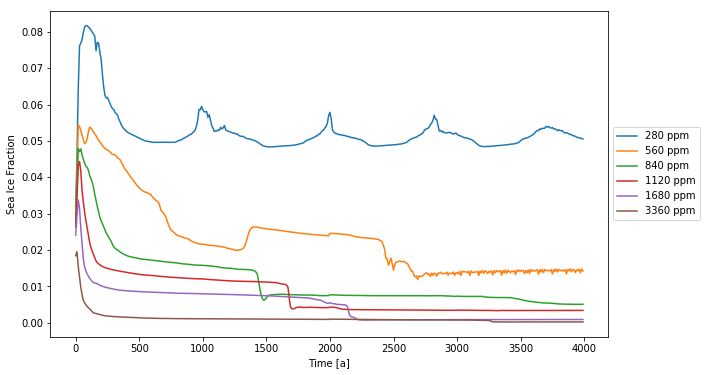

In [45]:
time=np.arange(0,4000,10)

plt.figure(figsize=(10,6))
plt.plot(time,sicweighted_280,label='280 ppm')
plt.plot(time,sicweighted_560,label='560 ppm')
plt.plot(time,sicweighted_840,label='840 ppm')
plt.plot(time,sicweighted_1120,label='1120 ppm')
plt.plot(time,sicweighted_1680,label='1680 ppm')
plt.plot(time,sicweighted_3360,label='3360 ppm')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Time [a]')
plt.ylabel('Sea Ice Fraction')
plt.show()

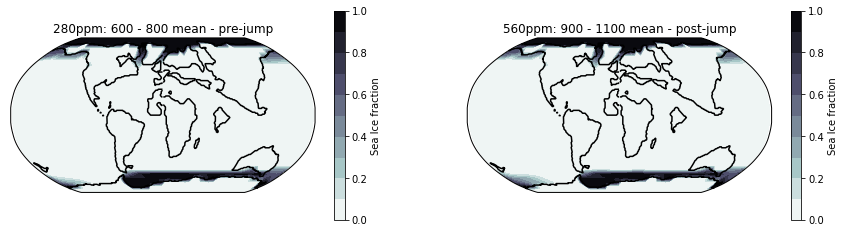

In [43]:
prejump_280=slicesic(sic_cx_280,'fsic',59,89)
postjump_280=slicesic(sic_cx_280,'fsic',89,-119)
plot_fseaice(prejump_280,postjump_280,'280ppm: 600 - 800 mean - pre-jump','560ppm: 900 - 1100 mean - post-jump')

In [45]:
plot_fseaice_slider(sic_cx_280.fsic,'')

A Jupyter Widget

A Jupyter Widget

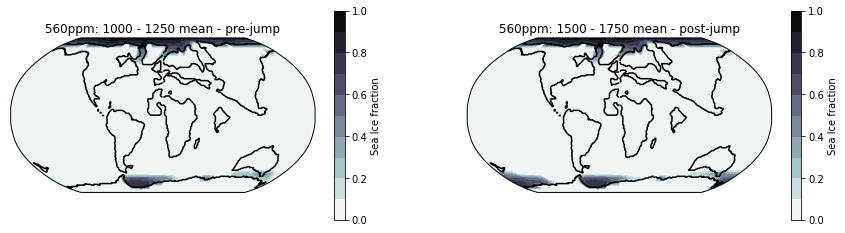

In [34]:
prejump_560=slicesic(sic_cx_560,'fsic',-101,-76)
postjump_560=slicesic(sic_cx_560,'fsic',-56,-41)
plot_fseaice(prejump_560,postjump_560,'560ppm: 1000 - 1250 mean - pre-jump','560ppm: 1500 - 1750 mean - post-jump')

In [44]:
plot_fseaice_slider(sic_cx_560.fsic,'')

A Jupyter Widget

A Jupyter Widget

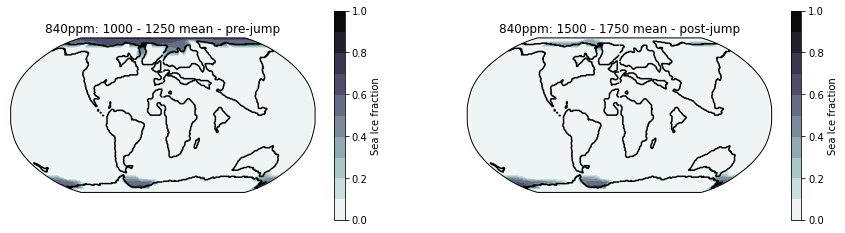

In [35]:
prejump_840=slicesic(sic_cx_840,'fsic',-101,-76)
postjump_840=slicesic(sic_cx_840,'fsic',-51,-26)
plot_fseaice(prejump_840,postjump_840,'840ppm: 1000 - 1250 mean - pre-jump','840ppm: 1500 - 1750 mean - post-jump')

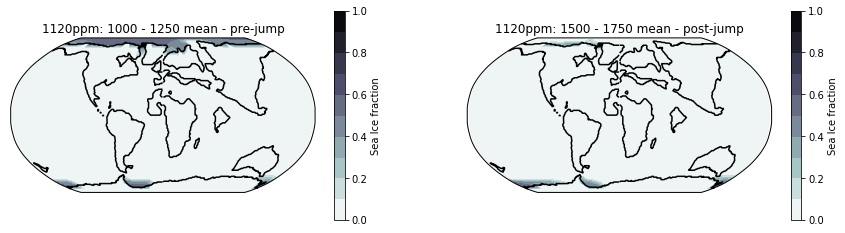

In [36]:
prejump_1120=slicesic(sic_cx_1120,'fsic',-61,-36)
postjump_1120=slicesic(sic_cx_1120,'fsic',-26,-1)
plot_fseaice(prejump_1120,postjump_1120,'1120ppm: 1000 - 1250 mean - pre-jump','1120ppm: 1500 - 1750 mean - post-jump')

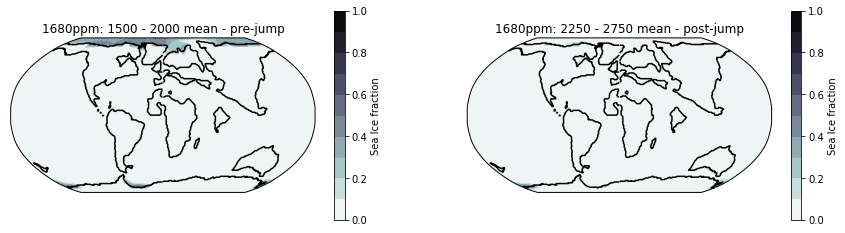

In [39]:
prejump_1680=slicesic(sic_cx_1680,'fsic',150,200)
postjump_1680=slicesic(sic_cx_1680,'fsic',225,275)
plot_fseaice(prejump_1680,postjump_1680,'1680ppm: 1500 - 2000 mean - pre-jump','1680ppm: 2250 - 2750 mean - post-jump')

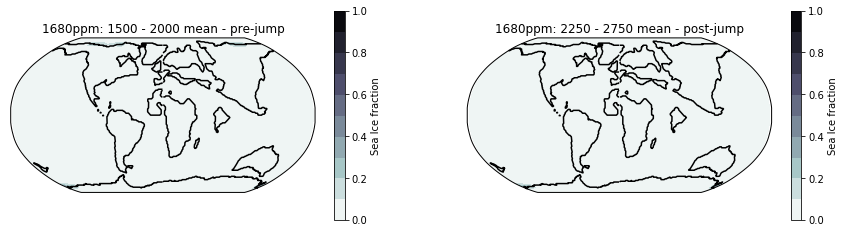

In [47]:
prejump_3360=slicesic(sic_cx_3360,'fsic',280,320)
postjump_3360=slicesic(sic_cx_3360,'fsic',330,380)
plot_fseaice(prejump_3360,postjump_3360,'1680ppm: 1500 - 2000 mean - pre-jump','1680ppm: 2250 - 2750 mean - post-jump')

### Ocn.nc

In [4]:
Path='/p/projects/ace/petri/climber-x-eocene/55Ma_'
ocn_cx_280=xr.open_mfdataset([Path+'0280ppm_eq/0002000.ocn.nc',Path+'0280ppm_eq/0003000.ocn.nc',Path+'0280ppm_eq/0004000.ocn.nc'])
ocn_cx_560=xr.open_mfdataset([Path+'0560ppm_eq/0002000.ocn.nc',Path+'0560ppm_eq/0003000.ocn.nc',Path+'0560ppm_eq/0004000.ocn.nc'])
ocn_cx_840=xr.open_mfdataset([Path+'0840ppm_eq/0002000.ocn.nc',Path+'0840ppm_eq/0003000.ocn.nc',Path+'0840ppm_eq/0004000.ocn.nc'])
ocn_cx_1120=xr.open_mfdataset([Path+'1120ppm_eq/0002000.ocn.nc',Path+'1120ppm_eq/0003000.ocn.nc',Path+'1120ppm_eq/0004000.ocn.nc'])
ocn_cx_1680=xr.open_mfdataset([Path+'1680ppm_eq/0002000.ocn.nc',Path+'1680ppm_eq/0003000.ocn.nc',Path+'1680ppm_eq/0004000.ocn.nc'])
ocn_cx_3360=xr.open_mfdataset([Path+'3360ppm_eq/0002000.ocn.nc',Path+'3360ppm_eq/0003000.ocn.nc',Path+'3360ppm_eq/0004000.ocn.nc'])

In [5]:
def slice200sal(infile,var):
    temp=infile[var][::]
    startyear=temp.time[-21]
    endyear=temp.time[-1]
    temp_200=temp.sel(time=slice(startyear,endyear))
    
    return temp_200

In [6]:
def plot_map_sal(v280_200,v560_200,v840_200,v1120_200,v1680_200,v3360_200,cbar,title,vmin,vmax):   


    diff280=v280_200.mean(dim='time').mean(dim='month').mean(dim='lev')
    diff560=v560_200.mean(dim='time').mean(dim='month').mean(dim='lev')
    diff840=v840_200.mean(dim='time').mean(dim='month').mean(dim='lev')
    diff1120=v1120_200.mean(dim='time').mean(dim='month').mean(dim='lev')
    diff1680=v1680_200.mean(dim='time').mean(dim='month').mean(dim='lev')
    diff3360=v3360_200.mean(dim='time').mean(dim='month').mean(dim='lev')



    fig,axs=plt.subplots(3,2, subplot_kw={'projection': ccrs.Robinson()},facecolor='w',figsize=(15,7)) #
    diff280.plot(ax=axs[0,0],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)
    diff560.plot(ax=axs[0,1],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)
    diff840.plot(ax=axs[1,0],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)
    diff1120.plot(ax=axs[1,1],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)
    diff1680.plot(ax=axs[2,0],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)
    diff3360.plot(ax=axs[2,1],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)
    
    
    for ax in axs.flat:
        lo_masks.plot.contour(ax=ax,transform=ccrs.PlateCarree(),levels=[0.5],colors='k');
        ax.set(xlabel='x-label', ylabel='y-label')
        axs[0,0].set_title('280ppm')
        axs[0,1].set_title('560ppm')
        axs[1,0].set_title('840ppm')
        axs[1,1].set_title('1120ppm')
        axs[2,0].set_title('1680ppm')
        axs[2,1].set_title('3360ppm')
        

    fig.suptitle(title, fontsize=16)

    plt.show() 

In [7]:
def plot_anomaly_sal(v280_200,v560_200,v840_200,v1120_200,v1680_200,v3360_200,cbar,title,vmin,vmax):   

    #create zonal mean 
    eqtemp280_zonal=v280_200.mean(dim='time').mean(dim='month').mean(dim='lev')


    #create differences
    diff280=v280_200.mean(dim='time').mean(dim='month').mean(dim='lev')-eqtemp280_zonal
    diff560=v560_200.mean(dim='time').mean(dim='month').mean(dim='lev')-eqtemp280_zonal
    diff840=v840_200.mean(dim='time').mean(dim='month').mean(dim='lev')-eqtemp280_zonal
    diff1120=v1120_200.mean(dim='time').mean(dim='month').mean(dim='lev')-eqtemp280_zonal
    diff1680=v1680_200.mean(dim='time').mean(dim='month').mean(dim='lev')-eqtemp280_zonal
    diff3360=v3360_200.mean(dim='time').mean(dim='month').mean(dim='lev')-eqtemp280_zonal



    fig,axs=plt.subplots(3,2, subplot_kw={'projection': ccrs.Robinson()},facecolor='w',figsize=(15,7)) #
    diff280.plot(ax=axs[0,0],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)
    diff560.plot(ax=axs[0,1],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)
    diff840.plot(ax=axs[1,0],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)
    diff1120.plot(ax=axs[1,1],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)
    diff1680.plot(ax=axs[2,0],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)
    diff3360.plot(ax=axs[2,1],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)
    
    
    for ax in axs.flat:
        lo_masks.plot.contour(ax=ax,transform=ccrs.PlateCarree(),levels=[0.5],colors='k');
        ax.set(xlabel='x-label', ylabel='y-label')
        axs[0,0].set_title('280ppm (Reference)')
        axs[0,1].set_title('560ppm')
        axs[1,0].set_title('840ppm')
        axs[1,1].set_title('1120ppm')
        axs[2,0].set_title('1680ppm')
        axs[2,1].set_title('3360ppm')
        

    fig.suptitle(title, fontsize=16)

    plt.show() 

In [ ]:
#area weighted 
mldweighted_280=weighted_mean_sic(ocn_cx_280.mld)
mldweighted_560=weighted_mean_sic(ocn_cx_560.mld)
mldweighted_840=weighted_mean_sic(ocn_cx_840.mld)
mldweighted_1120=weighted_mean_sic(ocn_cx_1120.mld)
mldweighted_1680=weighted_mean_sic(ocn_cx_1680.mld)
mldweighted_3360=weighted_mean_sic(ocn_cx_3360.mld)

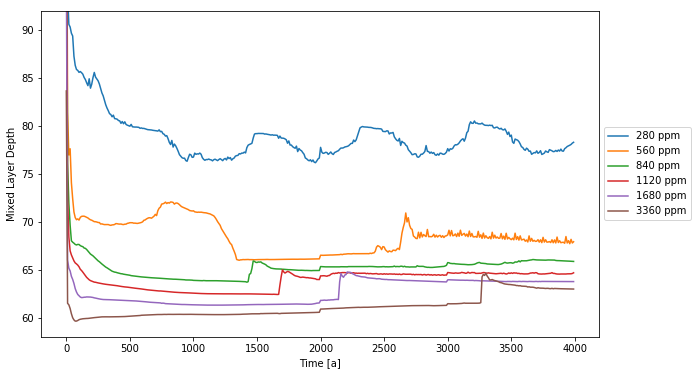

In [14]:
time=np.arange(0,4000,10)

plt.figure(figsize=(10,6))
plt.plot(time,mldweighted_280,label='280 ppm')
plt.plot(time,mldweighted_560,label='560 ppm')
plt.plot(time,mldweighted_840,label='840 ppm')
plt.plot(time,mldweighted_1120,label='1120 ppm')
plt.plot(time,mldweighted_1680,label='1680 ppm')
plt.plot(time,mldweighted_3360,label='3360 ppm')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Time [a]')
plt.ylabel('Mixed Layer Depth')
plt.ylim([58,92])
plt.show()

In [15]:
mld280_200=slice200a(ocn_cx_280,'mld')
mld560_200=slice200a(ocn_cx_560,'mld')
mld840_200=slice200a(ocn_cx_840,'mld')
mld1120_200=slice200a(ocn_cx_1120,'mld')
mld1680_200=slice200a(ocn_cx_1680,'mld')
mld3360_200=slice200a(ocn_cx_3360,'mld')

/p/system/packages/anaconda/5.0.0_py3/envs/idp/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/p/system/packages/anaconda/5.0.0_py3/envs/idp/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/p/system/packages/anaconda/5.0.0_py3/envs/idp/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


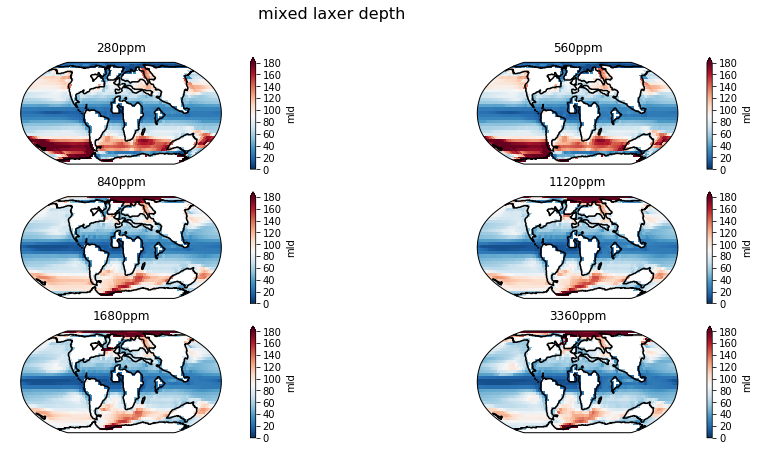

In [16]:
plot_map(mld280_200,mld560_200,mld840_200,mld1120_200,mld1680_200,mld3360_200,'RdBu_r','mixed laxer depth',0,180,mon=False)

In [20]:
sal280_200=slice200sal(ocn_cx_280,'s')
sal560_200=slice200sal(ocn_cx_560,'s')
sal840_200=slice200sal(ocn_cx_840,'s')
sal1120_200=slice200sal(ocn_cx_1120,'s')
sal1680_200=slice200sal(ocn_cx_1680,'s')
sal3360_200=slice200sal(ocn_cx_3360,'s')

/p/system/packages/anaconda/5.0.0_py3/envs/idp/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/p/system/packages/anaconda/5.0.0_py3/envs/idp/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


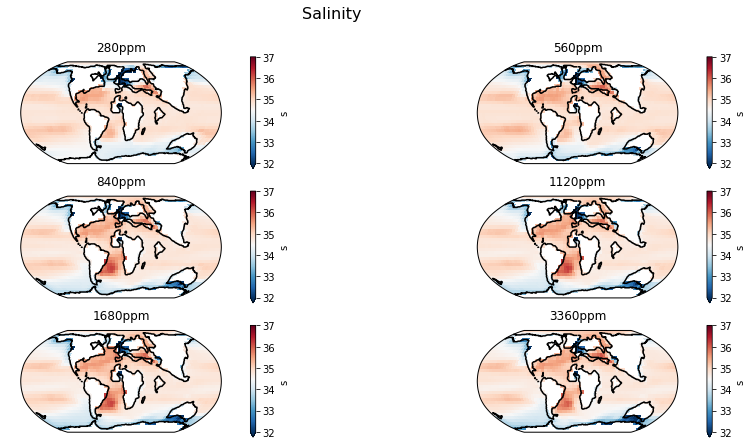

In [21]:
plot_map_sal(sal280_200,sal560_200,sal840_200,sal1120_200,sal1680_200,sal3360_200,'RdBu_r','Salinity',32,37)

/p/system/packages/anaconda/5.0.0_py3/envs/idp/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/p/system/packages/anaconda/5.0.0_py3/envs/idp/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


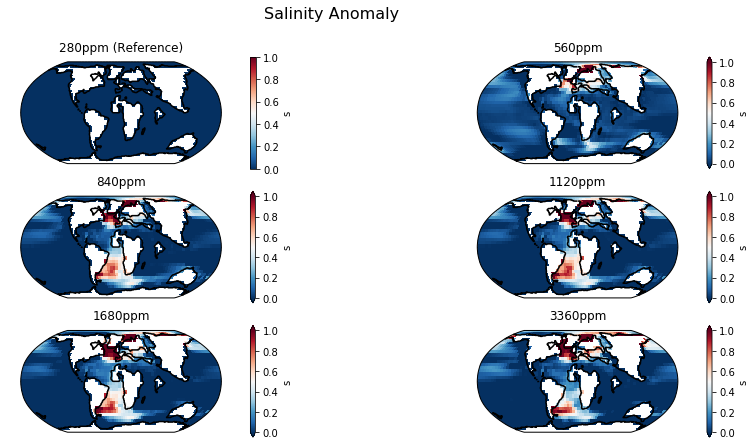

In [22]:
plot_anomaly_sal(sal280_200,sal560_200,sal840_200,sal1120_200,sal1680_200,sal3360_200,'RdBu_r','Salinity Anomaly',0,1)

In [ ]:
wd_sal_280=weighted_mean_sic(ocn_cx_280.s.mean(dim='lev'))
wd_sal_560=weighted_mean_sic(ocn_cx_560.s.mean(dim='lev'))
wd_sal_840=weighted_mean_sic(ocn_cx_840.s.mean(dim='lev'))
wd_sal_1120=weighted_mean_sic(ocn_cx_1120.s.mean(dim='lev'))
wd_sal_1680=weighted_mean_sic(ocn_cx_1680.s.mean(dim='lev'))
wd_sal_3360=weighted_mean_sic(ocn_cx_3360.s.mean(dim='lev'))

/p/system/packages/anaconda/5.0.0_py3/envs/idp/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/p/system/packages/anaconda/5.0.0_py3/envs/idp/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [ ]:
time=np.arange(0,4000,10)

plt.figure(figsize=(10,6))
plt.plot(time,wd_sal_280,label='280 ppm')
plt.plot(time,wd_sal_560,label='560 ppm')
plt.plot(time,wd_sal_840,label='840 ppm')
plt.plot(time,wd_sal_1120,label='1120 ppm')
plt.plot(time,wd_sal_1680,label='1680 ppm')
plt.plot(time,wd_sal_3360,label='3360 ppm')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Time [a]')
plt.ylabel('Salinity')
#plt.ylim([58,92])
plt.show()

### Orbital runs

In [21]:
cx_ob22_e0_p0=xr.open_dataset('/p/projects/ace/petri/climber-x-eocene/55Ma_0840ppm_O22p5_E0_P0_eq/atm.nc')
cx_ob23_e0_p0=xr.open_dataset('/p/projects/ace/petri/climber-x-eocene/55Ma_0840ppm_O23p5_E0_P0_eq/atm.nc')
cx_ob24_e69_p180=xr.open_dataset('/p/projects/ace/petri/climber-x-eocene/55Ma_0840ppm_O24p5_E0p069_P180_eq/atm.nc')
cx_ob24_e69_p270=xr.open_dataset('/p/projects/ace/petri/climber-x-eocene/55Ma_0840ppm_O24p5_E0p069_P270_eq/atm.nc')
cx_ob24_e69_p90=xr.open_dataset('/p/projects/ace/petri/climber-x-eocene/55Ma_0840ppm_O24p5_E0p069_P90_eq/atm.nc')
cx_ob24_e0_p0=xr.open_dataset('/p/projects/ace/petri/climber-x-eocene/55Ma_0840ppm_O24p5_E0_P0_eq/atm.nc')

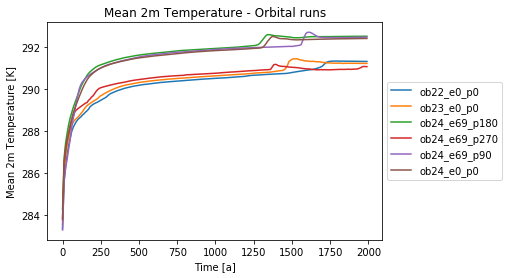

In [42]:
#area weighted 
weighted_cx_ob22_e0_p0=weighted_mean(cx_ob22_e0_p0.t2a,200)
weighted_cx_ob23_e0_p0=weighted_mean(cx_ob23_e0_p0.t2a,200)
weighted_cx_ob24_e69_p180=weighted_mean(cx_ob24_e69_p180.t2a,200)
weighted_cx_ob24_e69_p270=weighted_mean(cx_ob24_e69_p270.t2a,200)
weighted_cx_ob24_e69_p90=weighted_mean(cx_ob24_e69_p90.t2a,200)
weighted_cx_ob24_e0_p0=weighted_mean(cx_ob24_e0_p0.t2a,200)


time=np.arange(0,2000,10)

plt.plot(time,weighted_cx_ob22_e0_p0,label='ob22_e0_p0')
plt.plot(time,weighted_cx_ob23_e0_p0,label='ob23_e0_p0')
plt.plot(time,weighted_cx_ob24_e69_p180,label='ob24_e69_p180')
plt.plot(time,weighted_cx_ob24_e69_p270,label='ob24_e69_p270')
plt.plot(time,weighted_cx_ob24_e69_p90,label='ob24_e69_p90')
plt.plot(time,weighted_cx_ob24_e0_p0,label='ob24_e0_p0')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Time [a]')
plt.ylabel('Mean 2m Temperature [K]')
plt.title('Mean 2m Temperature - Orbital runs')
plt.show()

In [24]:
cx_ob22_e0_p0_200=slice200a(cx_ob22_e0_p0,'t2a')
cx_ob23_e0_p0_200=slice200a(cx_ob23_e0_p0,'t2a')
cx_ob24_e69_p180_200=slice200a(cx_ob24_e69_p180,'t2a')
cx_ob24_e69_p270_200=slice200a(cx_ob24_e69_p270,'t2a')
cx_ob24_e69_p90_200=slice200a(cx_ob24_e69_p90,'t2a')
cx_ob24_e0_p0_200=slice200a(cx_ob24_e0_p0,'t2a')

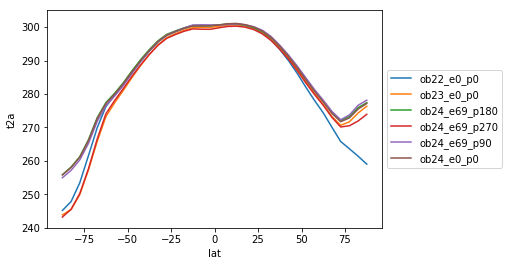

In [54]:
#Zonal mean 
cx_ob22_e0_p0_200.mean(dim='time').mean(dim='mon').mean(dim='lon').plot(label='ob22_e0_p0')
cx_ob23_e0_p0_200.mean(dim='time').mean(dim='mon').mean(dim='lon').plot(label='ob23_e0_p0')
cx_ob24_e69_p180_200.mean(dim='time').mean(dim='mon').mean(dim='lon').plot(label='ob24_e69_p180')
cx_ob24_e69_p270_200.mean(dim='time').mean(dim='mon').mean(dim='lon').plot(label='ob24_e69_p270')
cx_ob24_e69_p90_200.mean(dim='time').mean(dim='mon').mean(dim='lon').plot(label='ob24_e69_p90')
cx_ob24_e0_p0_200.mean(dim='time').mean(dim='mon').mean(dim='lon').plot(label='ob24_e0_p0')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim([240,305])
plt.show()

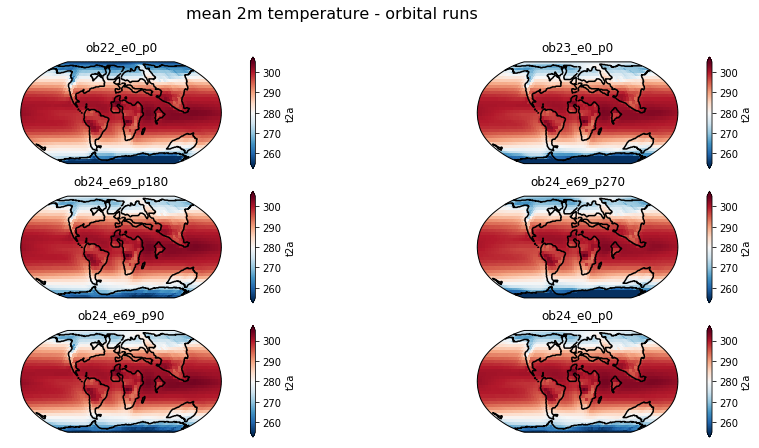

In [25]:
vmin=255
vmax=305
title='mean 2m temperature - orbital runs'
cbar='RdBu_r'

fig,axs=plt.subplots(3,2, subplot_kw={'projection': ccrs.Robinson()},facecolor='w',figsize=(15,7)) #
cx_ob22_e0_p0_200.mean(dim='time').mean(dim='mon').plot(ax=axs[0,0],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)
cx_ob23_e0_p0_200.mean(dim='time').mean(dim='mon').plot(ax=axs[0,1],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)
cx_ob24_e69_p180_200.mean(dim='time').mean(dim='mon').plot(ax=axs[1,0],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)
cx_ob24_e69_p270_200.mean(dim='time').mean(dim='mon').plot(ax=axs[1,1],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)
cx_ob24_e69_p90_200.mean(dim='time').mean(dim='mon').plot(ax=axs[2,0],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)
cx_ob24_e0_p0_200.mean(dim='time').mean(dim='mon').plot(ax=axs[2,1],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)


for ax in axs.flat:
    lo_masks.plot.contour(ax=ax,transform=ccrs.PlateCarree(),levels=[0.5],colors='k');
    ax.set(xlabel='x-label', ylabel='y-label')
    axs[0,0].set_title('ob22_e0_p0')
    axs[0,1].set_title('ob23_e0_p0')
    axs[1,0].set_title('ob24_e69_p180')
    axs[1,1].set_title('ob24_e69_p270')
    axs[2,0].set_title('ob24_e69_p90')
    axs[2,1].set_title('ob24_e0_p0')


fig.suptitle(title, fontsize=16)

plt.show()

In [26]:
def plot_cx_orb(cx_ob22_e0_p0_200,cx_ob23_e0_p0_200,cx_ob24_e69_p180_200,cx_ob24_e69_p270_200,cx_ob24_e69_p90_200,cx_ob24_e0_p0_200,cbar,title,vmin,vmax):   

    #create zonal mean 
    zonal=cx_ob22_e0_p0_200.mean(dim='time').mean(dim='mon') #.mean(dim='lon')
    
    #create differences
    diff2200=cx_ob22_e0_p0_200.mean(dim='time').mean(dim='mon')-zonal
    diff2300=cx_ob23_e0_p0_200.mean(dim='time').mean(dim='mon')-zonal
    diff2400=cx_ob24_e0_p0_200.mean(dim='time').mean(dim='mon')-zonal
    diff2469180=cx_ob24_e69_p180_200.mean(dim='time').mean(dim='mon')-zonal
    diff2469270=cx_ob24_e69_p270_200.mean(dim='time').mean(dim='mon')-zonal
    diff246990=cx_ob24_e69_p90_200.mean(dim='time').mean(dim='mon')-zonal



    fig,axs=plt.subplots(3,2, subplot_kw={'projection': ccrs.Robinson()},facecolor='w',figsize=(15,7)) #
    diff2200.plot(ax=axs[0,0],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)
    diff2300.plot(ax=axs[0,1],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)
    diff2469180.plot(ax=axs[1,0],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)
    diff2469270.plot(ax=axs[1,1],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)
    diff246990.plot(ax=axs[2,0],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)
    diff2400.plot(ax=axs[2,1],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)


    for ax in axs.flat:
        lo_masks.plot.contour(ax=ax,transform=ccrs.PlateCarree(),levels=[0.5],colors='k');
        ax.set(xlabel='x-label', ylabel='y-label')
        axs[0,0].set_title('ob22_e0_p0')
        axs[0,1].set_title('ob23_e0_p0')
        axs[1,0].set_title('ob24_e69_p180')
        axs[1,1].set_title('ob24_e69_p270')
        axs[2,0].set_title('ob24_e69_p90')
        axs[2,1].set_title('ob24_e0_p0')


    fig.suptitle(title, fontsize=16)

    plt.show()

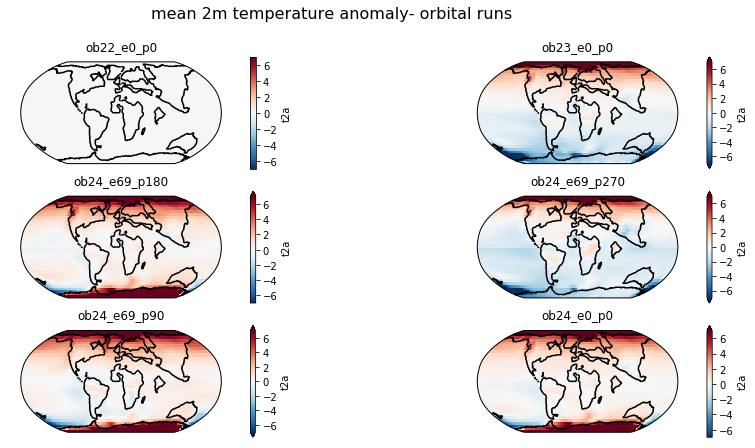

In [27]:
plot_cx_orb(cx_ob22_e0_p0_200,cx_ob23_e0_p0_200,cx_ob24_e69_p180_200,cx_ob24_e69_p270_200,cx_ob24_e69_p90_200,cx_ob24_e0_p0_200,'RdBu_r','mean 2m temperature anomaly- orbital runs',-7,7)

## DeepMIP

In [ ]:
def mip_co2():
    
    
    #280 ppm
    #Climber3a
    #ClimberX

### CO2 runs - Land 

#### Lnd_carb.nc

In [30]:
lnd_cx_280=xr.open_dataset('/p/projects/ace/petri/climber-x-eocene/55Ma_0280ppm_eq/lnd_carb.nc')
lnd_cx_480=xr.open_dataset('/p/projects/ace/petri/climber-x-eocene/55Ma_0480ppm_eq/lnd_carb.nc')
lnd_cx_560=xr.open_dataset('/p/projects/ace/petri/climber-x-eocene/55Ma_0560ppm_eq/lnd_carb.nc')
lnd_cx_840=xr.open_dataset('/p/projects/ace/petri/climber-x-eocene/55Ma_0840ppm_eq/lnd_carb.nc')
lnd_cx_1120=xr.open_dataset('/p/projects/ace/petri/climber-x-eocene/55Ma_1120ppm_eq/lnd_carb.nc')
lnd_cx_1680=xr.open_dataset('/p/projects/ace/petri/climber-x-eocene/55Ma_1680ppm_eq/lnd_carb.nc')
lnd_cx_3360=xr.open_dataset('/p/projects/ace/petri/climber-x-eocene/55Ma_3360ppm_eq/lnd_carb.nc')

In [31]:
lnd_280=slice200a(lnd_cx_280,'vegc')

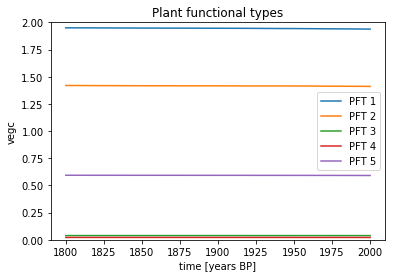

In [32]:
vegc_280=lnd_280.mean(dim=('lat','lon'))
pft1=vegc_280[:,0]
pft2=vegc_280[:,1]
pft3=vegc_280[:,2]
pft4=vegc_280[:,3]
pft5=vegc_280[:,4]

pft1.plot(label='PFT 1')
pft2.plot(label='PFT 2')
pft3.plot(label='PFT 3')
pft4.plot(label='PFT 4')
pft5.plot(label='PFT 5')

plt.ylim(0,2)
plt.legend()
plt.title('Plant functional types')
plt.show()

In [33]:
meanvegc_280=lnd_280.mean(dim='time')
mpft1=meanvegc_280[0,:,:]
mpft2=meanvegc_280[1,:,:]
mpft3=meanvegc_280[2,:,:]
mpft4=meanvegc_280[3,:,:]
mpft5=meanvegc_280[4,:,:]

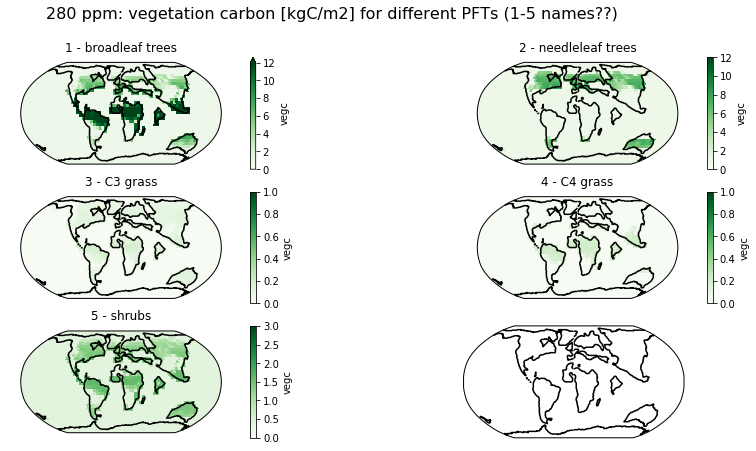

In [34]:
vmin=0
vmax=3
title='280 ppm: vegetation carbon [kgC/m2] for different PFTs (1-5 names??)'
cbar='Greens'
fig,axs=plt.subplots(3,2, subplot_kw={'projection': ccrs.Robinson()},facecolor='w',figsize=(15,7)) #
mpft1.plot(ax=axs[0,0],transform=ccrs.PlateCarree(),cmap=cbar,vmin=0,vmax=12)
mpft2.plot(ax=axs[0,1],transform=ccrs.PlateCarree(),cmap=cbar,vmin=0,vmax=12)
mpft3.plot(ax=axs[1,0],transform=ccrs.PlateCarree(),cmap=cbar,vmin=0,vmax=1)
mpft4.plot(ax=axs[1,1],transform=ccrs.PlateCarree(),cmap=cbar,vmin=0,vmax=1)
mpft5.plot(ax=axs[2,0],transform=ccrs.PlateCarree(),cmap=cbar,vmin=vmin,vmax=vmax)



for ax in axs.flat:
    lo_masks.plot.contour(ax=ax,transform=ccrs.PlateCarree(),levels=[0.5],colors='k');
    ax.set(xlabel='x-label', ylabel='y-label')
    axs[0,0].set_title('1 - broadleaf trees')
    axs[0,1].set_title('2 - needleleaf trees')
    axs[1,0].set_title('3 - C3 grass')
    axs[1,1].set_title('4 - C4 grass')
    axs[2,0].set_title('5 - shrubs')



fig.suptitle(title, fontsize=16)

plt.show()

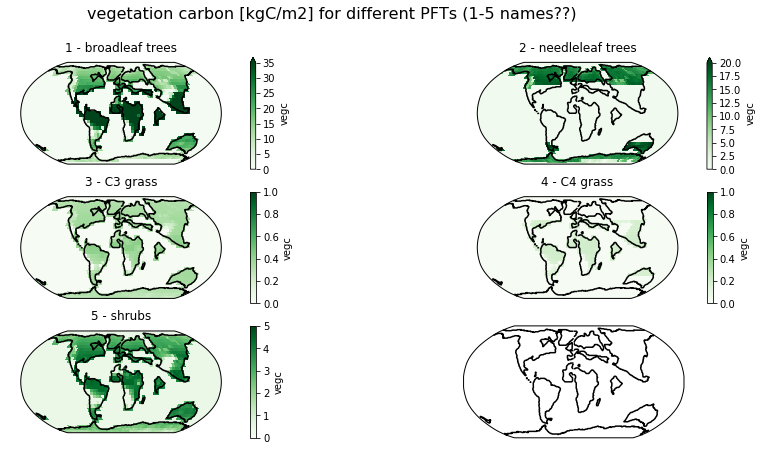

In [35]:
lnd_1680=slice200a(lnd_cx_1680,'vegc')
meanvegc_1680=lnd_1680.mean(dim='time')
mpft1_1680=meanvegc_1680[0,:,:]
mpft2_1680=meanvegc_1680[1,:,:]
mpft3_1680=meanvegc_1680[2,:,:]
mpft4_1680=meanvegc_1680[3,:,:]
mpft5_1680=meanvegc_1680[4,:,:]

vmin=0
vmax=3
title='vegetation carbon [kgC/m2] for different PFTs (1-5 names??)'
cbar='Greens'
fig,axs=plt.subplots(3,2, subplot_kw={'projection': ccrs.Robinson()},facecolor='w',figsize=(15,7)) #
mpft1_1680.plot(ax=axs[0,0],transform=ccrs.PlateCarree(),cmap=cbar,vmin=0,vmax=35)
mpft2_1680.plot(ax=axs[0,1],transform=ccrs.PlateCarree(),cmap=cbar,vmin=0,vmax=20)
mpft3_1680.plot(ax=axs[1,0],transform=ccrs.PlateCarree(),cmap=cbar,vmin=0,vmax=1)
mpft4_1680.plot(ax=axs[1,1],transform=ccrs.PlateCarree(),cmap=cbar,vmin=0,vmax=1)
mpft5_1680.plot(ax=axs[2,0],transform=ccrs.PlateCarree(),cmap=cbar,vmin=0,vmax=5)



for ax in axs.flat:
    lo_masks.plot.contour(ax=ax,transform=ccrs.PlateCarree(),levels=[0.5],colors='k');
    ax.set(xlabel='x-label', ylabel='y-label')
    axs[0,0].set_title('1 - broadleaf trees')
    axs[0,1].set_title('2 - needleleaf trees')
    axs[1,0].set_title('3 - C3 grass')
    axs[1,1].set_title('4 - C4 grass')
    axs[2,0].set_title('5 - shrubs')



fig.suptitle(title, fontsize=16)

plt.show()

In [ ]:
#df["model"]=='climber-x'

In [2]:
df=pd.read_csv('/p/projects/ace/aparna/name.csv')
df

Unnamed: 0 color      model   ppm  surfacetemp
0            0  blue  climber-x   280     3.752838
1            1  blue  climber-x   560    10.449890
2            2  blue  climber-x   840    13.292053
3            3  blue  climber-x  1120    14.512787
4            4  blue  climber-x  1680    16.227509
5            5  blue  climber-x  3360    19.103333
6            6   red   climber3   280     9.716388
7            7   red   climber3   560    12.754230
8            8   red   climber3   840    14.602122
9            9   red   climber3  1120    15.869746
10          10   red   climber3  1680    17.614075
11          11   red   climber3  3360    20.201340